In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

# make plots a bit larger & prettier
%matplotlib inline
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

In [2]:
iris = datasets.load_iris()
df = pd.DataFrame(
    data=np.c_[iris['data'], iris['target']],
    columns=iris['feature_names'] + ['target']
)
df['target'] = df['target'].astype(int)          # make target integer
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
summary = df.describe().T
summary['missing'] = df.isnull().sum()
summary

,count,mean,std,min,25%,50%,75%,max,missing
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9,0
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4,0
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9,0
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5,0
target,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0,0


In [4]:
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print("Missing values per column:")
print(df.isnull().sum())

Rows: 150, Columns: 5
Missing values per column:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


In [5]:
# Drop the target column, keep only the 4 features
X = df.iloc[:, :-1].values               # shape (150, 4)

# Covariance matrix (4×4) – classic linear‑algebra object
cov_mat = np.cov(X, rowvar=False)
cov_mat

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

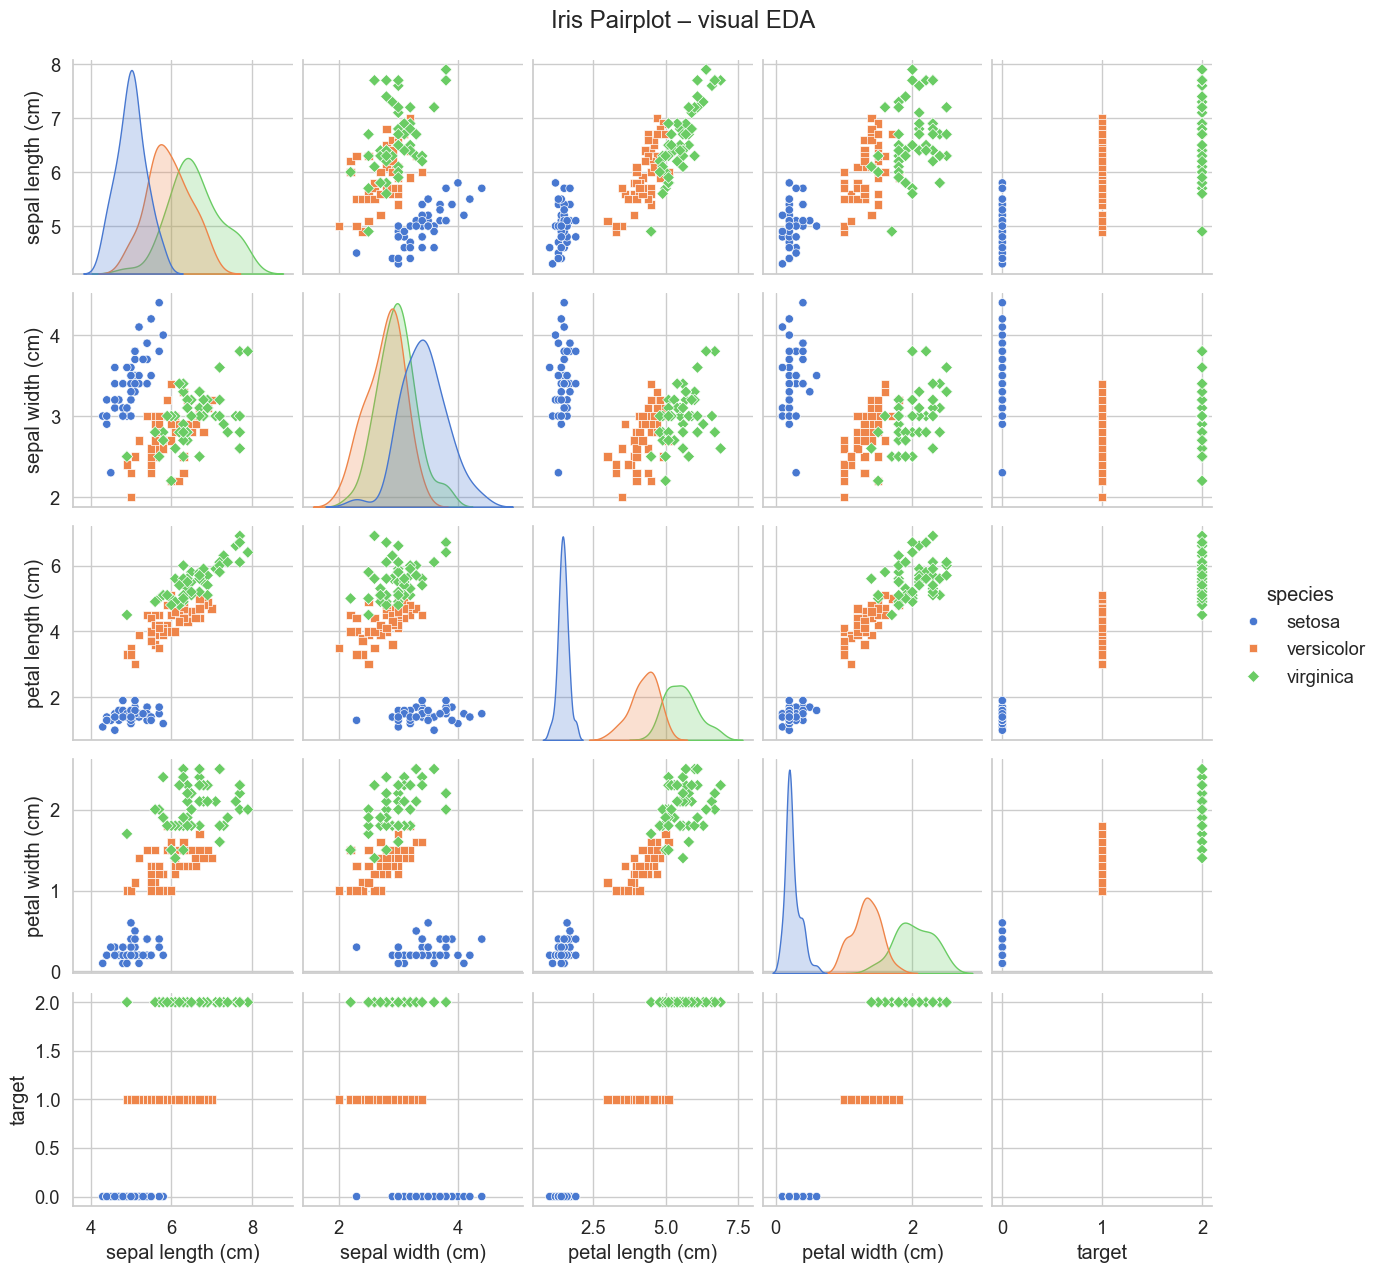

In [6]:
# Map numeric target → species name for nicer plot
species = pd.Categorical.from_codes(df['target'], iris['target_names'])
df['species'] = species

pairplot = sns.pairplot(df, hue="species", markers=["o", "s", "D"])
pairplot.fig.suptitle("Iris Pairplot – visual EDA", y=1.02)
plt.show()

In [7]:
pairplot.savefig("../figures/iris_pairplot.png", dpi=300, bbox_inches="tight")
print("✅ Figure saved to /figures/iris_pairplot.png")

✅ Figure saved to /figures/iris_pairplot.png


### What we learned

* The Iris dataset has **150 rows**, 4 numeric features, and 3 classes.  
* No missing values – a clean starter dataset.  
* The **covariance matrix** (4 × 4) shows how features co‑vary; you’ll revisit eigen‑decomposition later in linear‑algebra weeks.  
* The pairplot visually confirms that *setosa* is linearly separable, while *versicolor* and *virginica* overlap – a classic case that motivates more sophisticated models.

Next steps → **Phase 1 – Math Foundations**:  
- Compute eigenvalues/eigenvectors of the covariance matrix (use `np.linalg.eig`).  
- Implement a tiny PCA from scratch and visualize the 2‑D projection.